# Midterm 52002 - 2024-2025

**General instructions:** The mid-term should be done in pairs. Submit your solutions in the course by uploading the solution files to the course Moodle page by 10.1.2025

**.ipynb solution file:** Fill-in the missing code blocks (for parts 1 and 3)and text blocks (for all three parts) in this ipynb notebook, change the name to `MidTerm_52002_2025_25_<ID1>_<ID2>.ipynb` where replace `<ID1>` and `<ID2>` by your ID nuymbers. Run the filled-notebook it in jupyter notebooks/google colab and upload to moodle the **filled** notebook with results (tables, graphs etc.).

**In addition**, submit a pdf/html export of the executed notebook with all the output, named `MidTerm_52002_2025_25_<ID1>_<ID2>.html` (or `.pdf`). Failing to submit both files as instructed will lead to a reduction in your midtem grade.


**Good luck!**


# BigQuery & SQL - 40 points
There are 5 sub-questions in this part. Each sub-question is worth 8 points

BigQuery is Google's serverless data warehouse that enables scalable analysis   
over petabytes of data. It is a Platform as a Service (PaaS) that supports querying   
using SQL. In this part of the midterm you'll be asked to query BigQuery tables    
using its python API. Please use the `sandbox` BigQuery environment and query   
only public datasets.

**Please note:**
Your BigQuery's resources are limited to `1 TB` per user per month - be mindful with how many queries you   
execute and try to optimize your queries as much as possible.


**We will utilize two datasets about New-York City:**

The first one called `new_york_311` is the 311 calls or service requests dataset, which contains resident complaints from 2010 to 2022.

The second dataset called `new_york_trees` is the "2015 Street Tree Census - Tree Data," which includes information from the 1995, 2005, and 2015 Street Tree Censuses. This dataset catalogs trees by address and provides details such as species, diameter, and condition.

More information on the two datasets can be found [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) and [here](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data).   

**Guidelines:**  
1. Fill this notebook with python commands including SQL queries in the designated places and run it using a jupyter notebook environment (e.g. google colab)
2. Write efficient SQL queries and code. Points may be taken off for inefficient queries and code.
3. The python API enables us to write code that interacts with BigQuery and convert between the SQL tables to python objects, thus allowing analysis and plotting using python code. You should write your SQL commands within the API. It is recommended to first browse the dataset and run the SQL command manualy in the BigQuery web-browser environment, before copying it to the python notebool.      
4. Your plots should be clear, with titles, and with propoer x-y labels.
You may use the `matplotlib` library, or `pandas.DataFrame.plot` for your plots.
5. When reading BigQuery tables, used the `` symbols to around the table's name, and use as prefix `'Big Query'` and the name of the dataset. For example, to extract a table present in the `new_york_trees` dataset you should use the name
`'bigquery-public-data.new_york_trees.<table-name>'` where `<table-name>` is replaced by the name of the table.

**Necessary Libraries:**  
(Do not use any libraries that are not in this list without permission in writing form the course staff)

In [220]:
import pandas as pd
import matplotlib as plt
from google.cloud import bigquery
from sqlite3 import connect

### Q1: BigQuery client & Initital Query

In [221]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Construct a BigQuery client object using the `client` method of the `bigquery` module.  The project name you use here should match the name of the project you open in the BigQuery environment. You should use in both places the same **non-huji** google user name

In [222]:
client = bigquery.Client(project="big-data-mining-52002-midterm")

Make a simple query displaying five columns of your choice from one of the tables of your choice in the two datasetsin order to check the connection. Limit the number of rows in the displayed output to 10

In [223]:
my_query = """
SELECT block_id, tree_id, created_at, tree_dbh, status
FROM `bigquery-public-data.new_york_trees.tree_census_2015`
LIMIT 10
"""

# Execute the query
query_job = client.query(my_query)  # Make an API request
results = query_job.result().to_dataframe()  # Convert results to a pandas DataFrame

# Display the output
results.head(10)

,block_id,tree_id,created_at,tree_dbh,status
0,502982,80548,2015-07-20,0,Stump
1,503216,449489,2015-11-12,0,Stump
2,503196,449293,2015-11-12,0,Stump
3,503188,449153,2015-11-12,0,Stump
4,503152,449148,2015-11-12,0,Stump
5,503778,68192,2015-07-15,0,Stump
6,503349,68347,2015-07-15,0,Stump
7,503884,68393,2015-07-15,0,Stump
8,503258,324827,2015-10-14,0,Stump
9,503263,325180,2015-10-14,0,Stump


#### Q1 Explanations
The query was executed to test the connection to the BigQuery environment and validate access to the public dataset `new_york_trees.tree_census_2015`. It retrieves five columns:
- **block_id**: Identifies the block where the tree is located.
- **tree_id**: A unique identifier for each tree in the census.
- **created_at**: The timestamp when the record was created.
- **tree_dbh**: The diameter at breast height (DBH) of the tree, an indicator of its size.
- **status**: The status of the tree (e.g., "Alive", "Dead", "Stump").

The query limits the result to 10 rows for simplicity, ensuring minimal resource usage during this validation step.

#### Results:
The output is a table containing sample rows from the dataset with the selected columns. This confirms:
1. The connection to BigQuery was successfully established.
2. The dataset is accessible, and data can be queried.


### Q2: Exploratory Data Analysis
**Remark:** unless specified otherwise, refer to the following dataset when considering data for trees:
`'bigquery-public-data.new_york_trees.tree_census_2015'`

2a. How many trees were there in New York in 2015, and how many of these were healthy (whose health status is not `Poor` or `null`)?

2b. What are the ten most common tree species in New York?  Run a query that returns a table with the number of trees for each species, the number of healthy trees and the percentage of healthy trees within each species (relative to the total trees of that species).
Display the output table with these details only for the ten species with the highest overall counts.

2c. Analyze the status distribution of New York City's trees by examining each ZIP code area. Your analysis should reveal the total number of trees per ZIP code along with the percentage of trees in each of the health status categories within each ZIP code. Exclude records with missing data (`zipcode` or `status`) . Show a table with the results for the five ZIP codes with the highest number of total trees.




**Answer:**

#### Q2a

In [224]:
# 2a)
query2a = """
SELECT
  COUNT(*) AS total_trees,
  COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees
FROM `bigquery-public-data.new_york_trees.tree_census_2015`
"""
query_job2a = client.query(query2a)  # Make an API request.

# Output and print
df2a = pd.DataFrame(query_job2a.result().to_dataframe())
df2a.head()

,total_trees,healthy_trees
0,683788,625354


##### Q2a Explanations
The query retrieves the total number of trees and the number of healthy trees in New York City in 2015 from the dataset `bigquery-public-data.new_york_trees.tree_census_2015`.

- **Total Trees**: 683,788
- **Healthy Trees**: 625,354

A tree is considered healthy if its `health` status is neither "Poor" nor `NULL`. These numbers indicate that approximately **91.4%** of the trees in the dataset were healthy in 2015.

#### Q2b

In [225]:
# 2b)
query2b = """
SELECT
  spc_common AS species,
  COUNT(*) AS total_trees,
  COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees,
  ROUND(COUNTIF(health != 'Poor' AND health IS NOT NULL) / COUNT(*) * 100, 2) AS healthy_percentage
FROM `bigquery-public-data.new_york_trees.tree_census_2015`
WHERE spc_common IS NOT NULL
GROUP BY species
ORDER BY total_trees DESC
LIMIT 10
"""

query_job2b = client.query(query2b)  # Make an API request.

# Output and print
df2b = pd.DataFrame(query_job2b.result().to_dataframe())
df2b.head()

,species,total_trees,healthy_trees,healthy_percentage
0,London planetree,87014,84816,97.47
1,honeylocust,64264,63073,98.15
2,Callery pear,58931,56842,96.46
3,pin oak,53185,51950,97.68
4,Norway maple,34189,30410,88.95


##### Q2b Explanations
The query identifies the ten most common tree species in New York City in 2015 based on the dataset `bigquery-public-data.new_york_trees.tree_census_2015`. For each species, it calculates:
1. **Total Trees**: The total number of trees of that species.
2. **Healthy Trees**: The number of trees with a `health` status that is not "Poor" or `NULL`.
3. **Healthy Percentage**: The percentage of healthy trees within the species.

#### Observations:
- The **London planetree** is the most common species with 87,014 trees, of which 97.47% are healthy.
- The **Honeylocust** has the highest healthy percentage among the top five species, with 98.15% of its 64,264 trees being healthy.
- The **Norway maple** has the lowest healthy percentage among the top five, with 88.95% of its 34,189 trees being healthy.

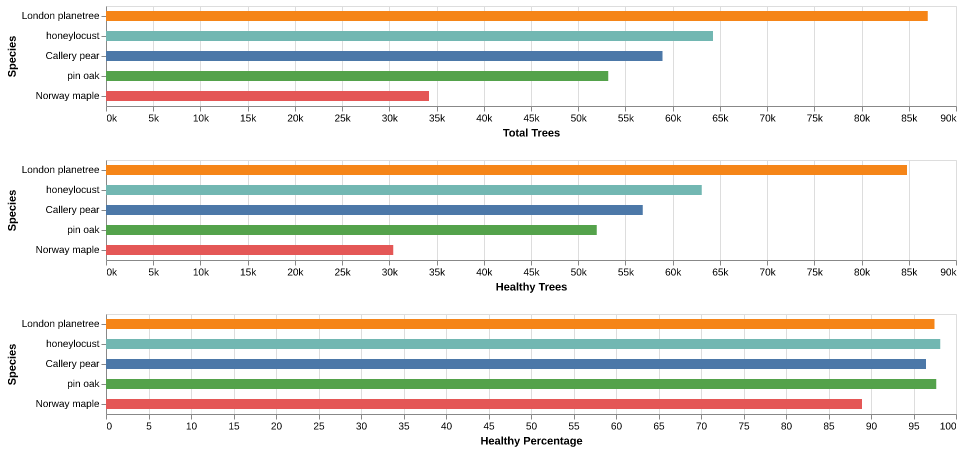

In [226]:
import altair as alt
alt.renderers.enable('png')

# Chart 1: Total Trees (Defines the sorting order)
chart1 = alt.Chart(df2b.head()).mark_bar(size=10).encode(
    x=alt.X("total_trees:Q", title="Total Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort="-x"),  # Sort by total_trees
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "total_trees"]
).properties(
    width=850,  # Keep width 850
    height=100,  # Keep height 100
)

# Chart 2: Healthy Trees (Use the same sorting as chart1)
chart2 = alt.Chart(df2b.head()).mark_bar(size=10).encode(
    x=alt.X("healthy_trees:Q", title="Healthy Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "healthy_trees"]
).properties(
    width=850,
    height=100,
)

# Chart 3: Healthy Percentage (Use the same sorting as chart1)
chart3 = alt.Chart(df2b.head()).mark_bar(size=10).encode(
    x=alt.X("healthy_percentage:Q", title="Healthy Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "healthy_percentage"]
).properties(
    width=850,
    height=100,
)

# Combine charts vertically
chart1 & chart2 & chart3

#### Q2c

In [227]:
# 2c)
query2c = """
SELECT
  zipcode,
  COUNT(*) AS total_trees,
  ROUND(COUNTIF(health = 'Good') / COUNT(*) * 100, 2) AS good_percentage,
  ROUND(COUNTIF(health = 'Fair') / COUNT(*) * 100, 2) AS fair_percentage,
  ROUND(COUNTIF(health = 'Poor') / COUNT(*) * 100, 2) AS poor_percentage
FROM `bigquery-public-data.new_york_trees.tree_census_2015`
WHERE zipcode IS NOT NULL AND health IS NOT NULL
GROUP BY zipcode
ORDER BY total_trees DESC
LIMIT 5
"""

# Execute the query
query_job2c = client.query(query2c)
df2c = query_job2c.result().to_dataframe()

# Display the results
df2c.head()

,zipcode,total_trees,good_percentage,fair_percentage,poor_percentage
0,10312,21356,78.16,16.83,5.01
1,10314,16330,81.62,14.33,4.05
2,10306,12616,82.80,14.28,2.92
3,10309,12105,81.69,13.41,4.90
4,11234,10838,85.14,11.72,3.15


##### Q2c Explanations
The query examines the distribution of tree health status across ZIP code areas in New York City, based on the dataset `bigquery-public-data.new_york_trees.tree_census_2015`. It calculates:
1. **Total Trees**: The number of trees in each ZIP code.
2. **Good Percentage**: The percentage of trees with "Good" health in each ZIP code.
3. **Fair Percentage**: The percentage of trees with "Fair" health in each ZIP code.
4. **Poor Percentage**: The percentage of trees with "Poor" health in each ZIP code.

#### Observations:
- **ZIP Code 10312** has the highest total number of trees, with 21,356 trees, where 78.16% are in "Good" health.
- **ZIP Code 11234** has the highest percentage of "Good" health trees (85.14%) among the top five ZIP codes with the most trees.
- Across all listed ZIP codes, the percentage of trees in "Poor" health remains below 6%, indicating an overall positive trend in tree health.

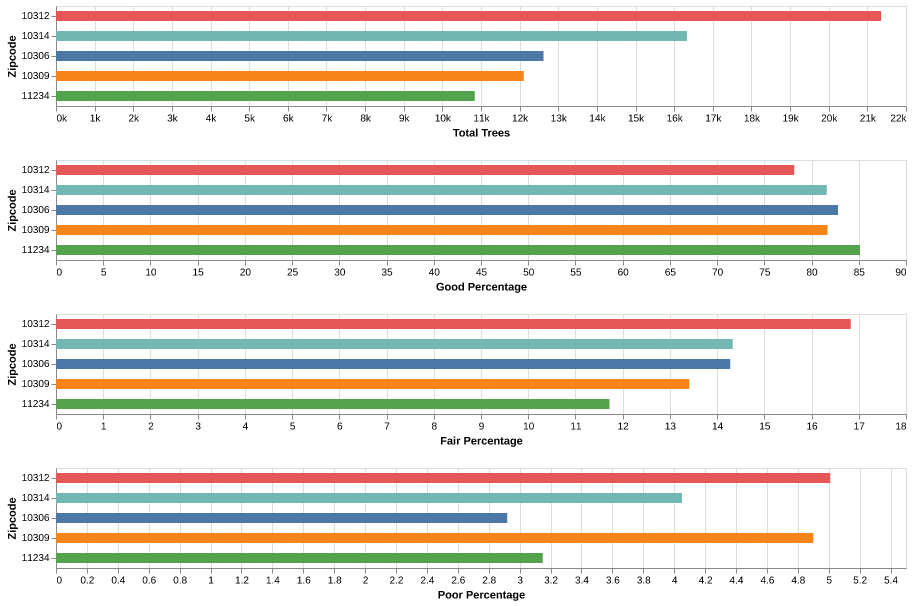

In [228]:
import altair as alt

# Chart 1: Total Trees (Defines the sorting order)
chart1 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("total_trees:Q", title="Total Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort="-x"),  # Sort by total_trees
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "total_trees"]
).properties(
    width=850,  # Keep width 850
    height=100,  # Keep height 100
)

# Chart 2: Good Percentage (Use the same sorting as chart1)
chart2 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("good_percentage:Q", title="Good Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "good_percentage"]
).properties(
    width=850,
    height=100,
)

# Chart 3: Fair Percentage (Use the same sorting as chart1)
chart3 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("fair_percentage:Q", title="Fair Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "fair_percentage"]
).properties(
    width=850,
    height=100,
)

# Chart 4: Poor Percentage (Use the same sorting as chart1)
chart4 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("poor_percentage:Q", title="Poor Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "poor_percentage"]
).properties(
    width=850,
    height=100,
)

# Combine charts vertically
chart1 & chart2 & chart3 & chart4

### Q3: Changes Over Time
**3a.** Write a query that extracts for each tree species the change in the the number of trees in New York State from 1995 to 2015, using the dataset `'bigquery-public-data.new_york_trees.tree_census_1995'` in addition to `'bigquery-public-data.new_york_trees.tree_census_2015'`. Sort the resulting list by the absolute value of the change in the number of trees, and display the five species with the highest absolute change in the number of trees. Show the number of trees in 1995, in 2015 and the change for these species. Since the names sometimes differ between the years, use the uppercase version of `spc_latin` for each year. Then, merge the data using a `CROSS JOIN`, with the condition that the [`EDIT_DISTANCE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/string_functions#edit_distance) between the names is less than or equal to 2.

**3b.** Compare the percentage trees of each fall foliage color for the years 1995 and 2015 separately using the `bigquery-public-data.new_york_trees.tree_species` dataset. If a tree species is not found in the dataset, assume its foliage color is "Unknown." Output a table showing for each fall foilage color the percent of trees in 1995, the percent of trees in 2015 and their difference, sorted by the aboslute value of the difference.
Use the same criteria for `CROSS JOIN` as in 3a. ('EDIT_DISTANCE' at most 2 for the uppercase names).

*Remark:* Consider each combination of colors (e.g. `Red/Bronze`) as a color of its own (different from the colors `Red` or `Bronze` in this example).


**Answer:**

#### Q3a

In [229]:
# 3a)
query3a = """
WITH census_1995 AS (
  SELECT
    UPPER(spc_latin) AS species_1995,
    COUNT(*) AS trees_1995
  FROM `bigquery-public-data.new_york_trees.tree_census_1995`
  GROUP BY species_1995
),
census_2015 AS (
  SELECT
    UPPER(spc_latin) AS species_2015,
    COUNT(*) AS trees_2015
  FROM `bigquery-public-data.new_york_trees.tree_census_2015`
  GROUP BY species_2015
)
SELECT
  c1995.species_1995 AS species,
  c1995.trees_1995,
  c2015.trees_2015,
  ABS(c1995.trees_1995 - c2015.trees_2015) AS change_in_trees
FROM census_1995 c1995
CROSS JOIN census_2015 c2015
WHERE EDIT_DISTANCE(c1995.species_1995, c2015.species_2015) <= 2
ORDER BY change_in_trees DESC
LIMIT 5
"""

# Execute the query
query_job3a = client.query(query3a)
df3a = query_job3a.result().to_dataframe()

# Display the results
df3a.head()

,species,trees_1995,trees_2015,change_in_trees
0,ACER PLATANOIDES,109325,34189,75136
1,PYRUS CALLERYANA,31295,58931,27636
2,ZELKOVA SERRATA,5740,29258,23518
3,ACER SACCHARINUM,22347,2844,19503
4,QUERCUS PALUSTRIS,36553,53185,16632


##### Q3a Explanation

#### **Query**:
1. **Subquery for Census Data in 1995** (`census_1995`):
   - We extract the species names (`spc_latin`) from the `tree_census_1995` dataset and use the `UPPER()` function to convert them to uppercase for easier matching.
   - We count the number of trees for each species in 1995 and group the results by the species name.

2. **Subquery for Census Data in 2015** (`census_2015`):
   - Similar to the previous subquery, we extract and count the number of trees for each species in 2015, grouping by the species name (also converted to uppercase).

3. **Combining the 1995 and 2015 Data**:
   - A `CROSS JOIN` is used to combine every row from `census_1995` with every row from `census_2015`. This is necessary because we need to compare each species from 1995 with each species from 2015. The `CROSS JOIN` produces a Cartesian product of the two subqueries.
   
4. **Using `EDIT_DISTANCE` for Name Matching**:
   - Since the species names may differ slightly between the two years (e.g., spelling variations), we use the `EDIT_DISTANCE()` function to match species names that are similar. We only include pairs of species whose names have an edit distance of 2 or less, which indicates a small difference (i.e., slight spelling discrepancies).
   
5. **Calculating the Change in the Number of Trees**:
   - The query computes the absolute difference between the number of trees for each species in 1995 and 2015. This is stored as `change_in_trees`.
   
6. **Sorting and Limiting**:
   - The results are ordered by the absolute change in the number of trees (`change_in_trees`) in descending order to identify the species with the highest changes. The query then limits the results to the top 5 species with the largest change.


#### **Interpretation of Results**:
- The table displays the **species** of trees, along with the number of trees in **1995** and **2015**, and the **absolute change** in the number of trees between these two years.
- For example, **ACER PLATANOIDES** had 109,325 trees in 1995, but this number dropped to 34,189 in 2015, resulting in a decrease of 75,136 trees. This is the largest change among the species in this table.
- On the other hand, **PYRUS CALLERYANA** saw an increase in the number of trees from 31,295 in 1995 to 58,931 in 2015, with a change of 27,636 trees.
- **ZELKOVA SERRATA** experienced a significant increase in tree numbers as well, growing from 5,740 trees in 1995 to 29,258 in 2015, an increase of 23,518 trees.
- Other species, such as **ACER SACCHARINUM** and **QUERCUS PALUSTRIS**, show different growth patterns, with some having notable declines or increases in tree numbers.

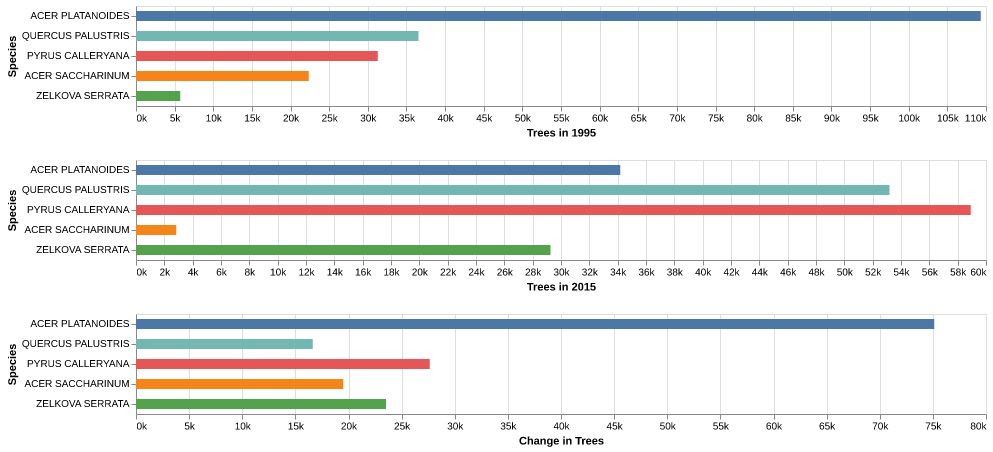

In [230]:
# Chart 1: Trees in 1995
chart1 = alt.Chart(df3a).mark_bar(size=10).encode(
    x=alt.X("trees_1995:Q", title="Trees in 1995", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort="-x"),  # Sort by trees_1995
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "trees_1995"]
).properties(
    width=850,
    height=100,
)

# Chart 2: Trees in 2015
chart2 = alt.Chart(df3a).mark_bar(size=10).encode(
    x=alt.X("trees_2015:Q", title="Trees in 2015", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="trees_1995", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "trees_2015"]
).properties(
    width=850,
    height=100,
)

# Chart 3: Change in Trees
chart3 = alt.Chart(df3a).mark_bar(size=10).encode(
    x=alt.X("change_in_trees:Q", title="Change in Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="trees_1995", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "change_in_trees"]
).properties(
    width=850,
    height=100,
)

# Combine the charts vertically
chart1 & chart2 & chart3

#### Q3b

In [231]:
# 3b)
# Your answer here:


##### Q3b Explanations

### Q4: Broken Windows Theory
**4a.** The [Broken Windows Theory](https://en.wikipedia.org/wiki/Broken_windows_theory) suggests that poor condition of city areas may affect crime levels. In this section, we’ll look for a correlation between the proportion of dead trees (relative to total trees) and the number of `NYPD` service requests in different zip codes.

Before calculating the correlation, run a query showing the different categories of the service requests to the `NYPD` and their counts (number of requests for each category) and explain whether they can be used as an imperfect measure of crime trends.

Next, extract the proportion of dead trees in 2015
for each zip code that is not `null` and has at least 100 trees, and the number of `NYPD` servise request excluding `Noise` normalized by the total number of requests in each of these zip codes for that year using SQL commands within python.
Next, extract the results as a python object (e.g. a pandas data-frame), display a scatter-plot showing the percent of dead trees and the number of service requests across the zip codes and compute their Pearson correlation.


Analyze the results to determine if they support the hypothesis. If they do, provide an explanation; if they don't, propose a confounding variable that might lead to inaccuracies.

**Hint:** Consider using `Having` in your query

In [232]:
# 4a)
# Your answer here:


Explanation here

In [233]:
# 4b)
# Your answer here:

Explanation here

### Q5: Tree-Related Complaints  
**5.a** Use the 311 dataset to count how many tree-related complaints each agency (for example `NYPD` or other agencies) received. Tree-related complaints are those that include the word `"Tree"` in the `complaint_type` field (case sensitive).

**5.b** Filter the tree-related complaints to include only such complaints to the agency with the highest number of tree-related complaints you have found in (a.). Find the three most common types of these tree-related complains and display them in a table with their counts.
Finally, create a bar chart that shows the number of the tree-related complaints of these three types for each year, where each bar is divided into three sub-bars of different colors, each indicating the tree-related complaint of each type in this year.

**Hint:** consider using a window function and the pivot function in Python to simplify the plot.

In [234]:
# 5a)
# Your answer here:


Explanation here

In [235]:
# # 5b)
# Your answer here:


Explanation here

# Unix  - 32 points
There are 5 questions in this part. Every question is worth 6 points except question 5 that is worth 8 points. You should solve all the questions using unix commands and include them in your answer, together with additional code/analysis required and the requested results.

## Q1: Simple Counting
 Copy the `review-Oregon.json.gz` file from the moriah cluster, located at
 the path `/sci/labs/orzuk/orzuk/teaching/big_data_mining_52002/midterm_2024_25` or at `/sci/home/orzuk`.
 You may work at the moriah cluster (recommended) or your personal computer.
Extract the file's content, and use the `wc` command to display the number of lines,words, and characters in the `review-Oregon.json` file. Print the first line of the file and briefly explain what the data represents.  


**Solutions:**

**Add Question 1 Shell Commands here:**
```
[commands to add]
```

**Add Question 1 Shell Output here:**
```
[copy output to here]
```


**Explanation:**


[Explain your solution here]



## Q2: Food and Images
Count the number of comments that include the word `"food"` (**not** case sensative). Out of those comments, determine how many included at least one image.

Next, perform the same query for the rest of the comments (that don't contain the word "food") and compare the proportions of comments with an image in the two categories. Is the difference in proportions statistically significant?

Describe a statistical test and test statistic and display the results. For the last calculation of the `test statistic` and `p-value` manual computation is allowed, but all previous steps should be implemented in unix commands. Explain the Unix command you wrote in simple language.

**Solutions:**

**Add Question 2 Shell Commands here:**
```
[commands to add]
```

**Add Question 2 Shell Output here:**
```
[copy output to here]
```

**Add Question 2 Statistical analysis here:**


**Explanation:**


[Explain your solution here]




## Q3: Top Users
From the people who mentioned `"food"` (**not** case sensative) in their comments, find the three users with the highest number of comments about `food` and display their user-ids together with the number of such comments for each one.





**Solutions:**

**Add Question 3 Shell Commands here:**
```
[commands to add]
```

**Add Question 3 Shell Output here:**
```
[copy output to here]
```


**Explanation:**


[Explain your solution here]



## Q4: Splitting
Split the `review-Oregon.json` file into different files based on the `rating` value. Name each file as `reviews_rating_i`, where `i` represents the rating value, and count the number of comments in each of these files.  


**Solutions:**

**Add Question 4 Shell Commands here:**
```
[commands to add]
```

**Add Question 4 Shell Output here:**
```
[copy output to here]
```


**Explanation:**


[Explain your solution here]



##Q5: Count Frequent Words
 Write a Python program (.py format) that takes a file name (as a string) and a natural number `k` as input. The program should read the file, extract the words from the reviews, split them into individual words, and print the top `k` most frequent words. Remove any stop words (common words) before computing the frequencies.  

 Next, run a shell script that runs the Python program you wrote on all the different rating files created earlier in Qu. 4 and print the top 5 most frequent words for each rating.  



In [236]:
# Copy code of python program here

**Solutions:**

**Add Question 5 Shell Commands here:**
```
[commands to add]
```

**Add Question 5 Shell Output here:**
```
[copy output to here]
```


**Explanation:**


[Explain your solution here]




# Networks - 28 points
There are 4 questions in this part. Every question is worth 7 points

In [237]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
import random
from scipy.sparse import csr_matrix
import time
import copy


## Q1: Exploratory Data Analysis

*Download* the `web-sk-2005` network dataset available here:
https://networkrepository.com/web.php.  
Unzip the file and read it to python (*Note:* this can take a few minutes to upload)

Display the first five rows of the dataset and explain what is shown and what the data represents.
Count the number of nodes and edges and display them to verify that your file is correct.

Finally, show two separate histograms, one for the distribution of in-degrees in the network, and one for the distribution of out-degrees. Descrbine your results.

In [238]:
from google.colab import files

# Upload the dataset file here
# uploaded = files.upload()

In [239]:
def load_network_data(file_name):
    """
    Write a function that loads the graph data
    """

# Load Filepath to the web-network dataset
graph = load_network_data("web-sk-2005.mtx")

# Display number of nodes and edges, and first 10 lines

# Comptue and plot degree distributions

[Explanation of results here]

## Q2: Page Rank Analysis
Run the PageRank algorithm with $\beta=0.9$ (i.e. teleport probability of $0.1$) and with tolerance of $\epsilon = 10^{-6}$. Plot the tolerance at each iteraction. Record the number of iterations needed for convergence.

Plot the *in-degree* vs. PageRank of each node in a scatter plot. Next, plot the *out-degree* vs. PageRank of each node in a separate scatter-plot. Compute in each plot the correlation coefficient. Which one of them is more correlated to PageRank? are the results surprising? explain


Explain in words -


In [240]:

# Code for computing pagerank here


# Display nodes with top pagerank score , with node ids



[Explanation of results here]

In [241]:
# Plot degrees histograms and degrees vs. pagerank scatter plots here



[Explanation of results here]


## Q3: PageRank Analysis of Spammers

Suppose that a spammer wants to inflater the PageRank of some pages. Choose random 100 pages and add edges between every pair of them (in both directions). Comptue the resulting PageRank for the new network. Next make two scatter plots:
(i.) The page-rank of each page before and after the change to the network by the spammers
(ii.) The in-degree vs. the pagerank after the change to the network by the spammer

Explain the changes observed after spamming.

Finally, repeat all steps above (adding spam edges, computing modified page-rank, plotting and explaining the results) for a different spammer strategy: choosing two distinct random sets of 100 nodes, and adding all possible links form the first set to the second set.
Which spamming strategy is more effective?

*Note:* Highlight in different colors the different sets of nodes in your scatter plots

In [242]:
# Code for adding edges here

[Explanation  here]

In [243]:
# Code for computing and displaying updated pagerank and degrees here

[Explanation of results here]








## Q4: PageRank Computational Complexity

Suppose that $A$ is an $n \times n$ matrix with distinct real eigenvalues and we implement the power method to find the leading eigenvector of $A$.

- What is the computational complexity of each iteration of the Power method as a function of $n$ for a general (dense) matrix $A$ as a function of $n$ (use Big-O notation)?

- Suppose that we know that $A = B+C$ where $B$ is a sparse matrix with $s$ non-zero values, and $C$ is a low-rank matrix with $rank(C)=k$. Write the algorithm of the Power method using $C$ and $B$ as input and utilizing their structure. What is the computational complexity as a function of $n$, $k$ and $s$? (use Big-O notation). You should represent $B$ and $C$ in a way that will minimize memory usage and computations.

- Suppose that we know that the convergence rate of the Power method is quadratic. That is, after $t$ iterations the $L_2$ distance between the pagerank vector $r^t$ computed after $t$ iterations and the true pagerank vector $r$ satisfies $||r^t - r||_2 \leq \frac{a}{t^2}$ for some constant $a > 0$. \\
We run the algorithm until reaching tolearance $\epsilon$ , i.e. our algorithm should return a vector $r'$ such that $||r'-r||_2 \leq \epsilon$. What will be the computational complexity of the entire algorithm for the above two cases as a function of $n,k,s$ and $\epsilon$? (you may assume that the constant $a$ is known).

[Solution text with Explanations of Computational Complexity of the different algorithms here]